# The Data Mine - Elanco BCS Project

## Project Introduction

The project's goal is to analyze the different body composition scores of dogs through methods in data science and computer vision. In this notebook, a brief overview of video analysis using deep learning tool and coordinates analysis using Python to calculate A:T ration based on a video will be presented.

Project posters and presentation video can be found at: https://datamine.purdue.edu/symposium/elanco/2021.html

## Rationale

A:T ratio is defined as the ratio of abdominal width to thoracic width. In other words, the ratio of waist width to the chest width, as we can see here in the figure 1. A:T ratio is shown to have a positive association with body fat percentage based on previous research, which is shown in figure 2. By calculating the A:T ratio using chest and waist width, we can set up thresholds to estimate the BCS level of a dog. 

#### Figure 1:
<div>
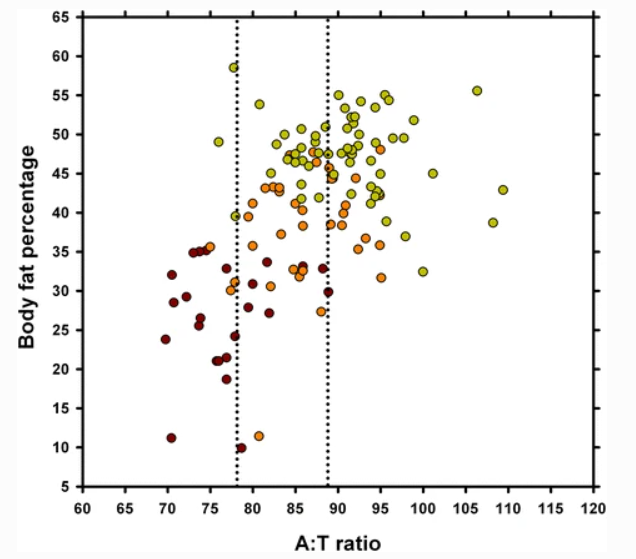
</div>
Gant, P., Holden, S.L., Biourge, V., German, A.J., 2016. Can you estimate body composition in dogs from photographs? BMC Vet Res 12, 18. https://doi.org/10.1186/s12917-016-0642-7


#### Figure 2
<div>
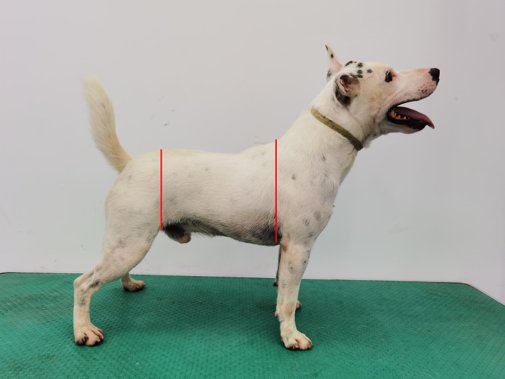
</div>

## Video feature extraction overview
DeelLabCut, a deep learning tool for pose estimation is used to label the top and bottom side of a dog’s chest and
waist in frames extracted as training data

<div>
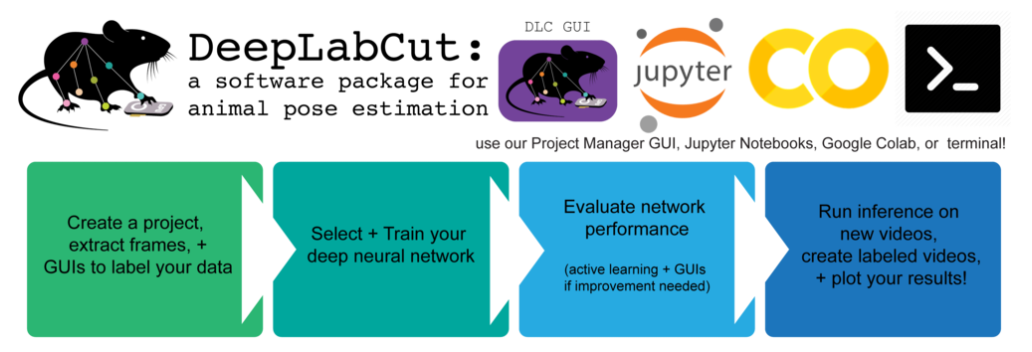
</div>

Label the top and bottom side of a dog’s chest and waist in frames extracted as training data

<div>
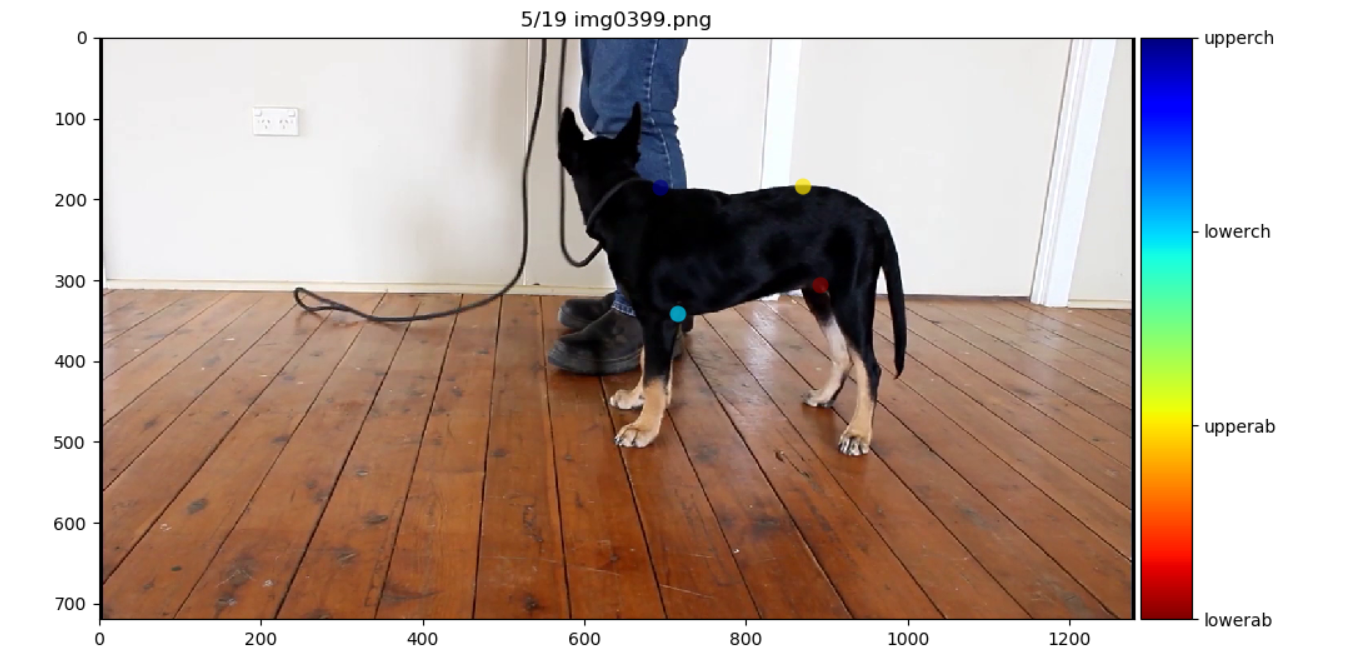
</div>

After the neural network is trained, a new video can be analyzed and the output (x, y) coordinates of labelled body parts can be used to calculate the chest length, waist length and then the A:T ratio. A screenshot of labeled video is shown in figure 3.

#### Figure 3
<div>
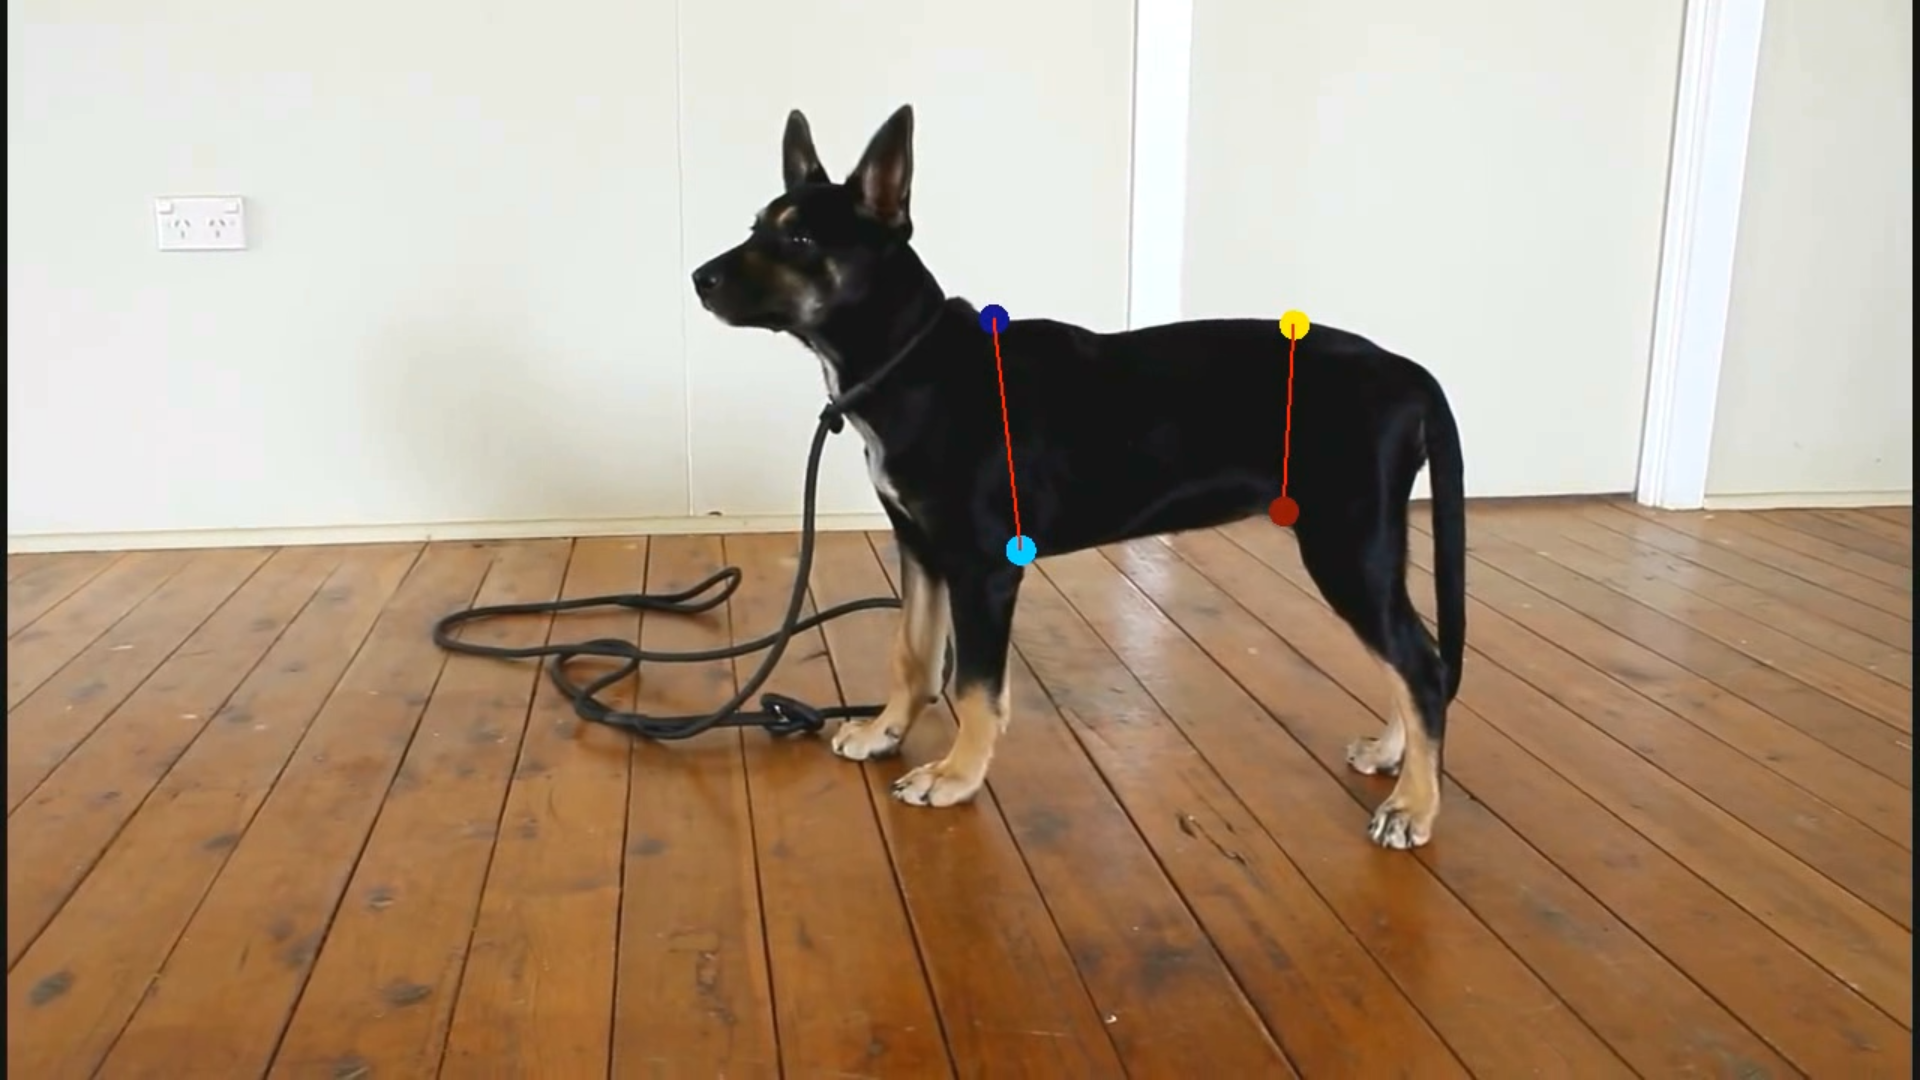
</div>

## Coordinates data analysis

Calculating the A:T ratio of each frame of the video analyzed, a distribution of A:T ratio can be then generated

In [1]:
import pandas as pd
import math
import seaborn as sns

In [2]:
# the order of the columns of coordinates is:
# upper chest, lower chest, upper abdomen, lower abdomen
df = pd.read_csv("dog_test.csv",skiprows=[0,1])
df.head()

coords           x           y  likelihood         x.1         y.1  \
0       0  665.636536  211.509537    0.917260  688.140320  362.156158   
1       1  667.051514  210.749420    0.875421  687.846863  361.344971   
2       2  668.396790  212.360138    0.897916  685.402039  364.081940   
3       3  666.731750  212.713394    0.893195  685.741638  365.387360   
4       4  669.860107  212.208344    0.871946  687.425903  367.056976   

   likelihood.1         x.2         y.2  likelihood.2         x.3         y.3  \
0      0.880980  865.392822  210.541763      0.886472  862.633606  336.770569   
1      0.893184  864.311584  210.604767      0.872167  862.911682  338.094818   
2      0.848279  865.766846  211.249222      0.887202  862.254028  337.428894   
3      0.823163  860.959839  210.263290      0.852279  862.693542  340.647278   
4      0.876012  865.558777  213.008194      0.912166  863.872253  342.163025   

   likelihood.3  
0      0.933754  
1      0.937130  
2      0.936309  
3      0.946253  
4      0.945868

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coords        225 non-null    int64  
 1   x             225 non-null    float64
 2   y             225 non-null    float64
 3   likelihood    225 non-null    float64
 4   x.1           225 non-null    float64
 5   y.1           225 non-null    float64
 6   likelihood.1  225 non-null    float64
 7   x.2           225 non-null    float64
 8   y.2           225 non-null    float64
 9   likelihood.2  225 non-null    float64
 10  x.3           225 non-null    float64
 11  y.3           225 non-null    float64
 12  likelihood.3  225 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 23.0 KB


In [3]:
# preprocessing the dataframe 
# here only keep likelihood > 0.5 for each of the bodyparts

data = df.copy()
data = data[data["likelihood"] > 0.5]
data = data[data["likelihood.1"] > 0.5]
data = data[data["likelihood.2"] > 0.5]
data = data[data["likelihood.3"] > 0.5]

data.head()

coords           x           y  likelihood         x.1         y.1  \
0       0  665.636536  211.509537    0.917260  688.140320  362.156158   
1       1  667.051514  210.749420    0.875421  687.846863  361.344971   
2       2  668.396790  212.360138    0.897916  685.402039  364.081940   
3       3  666.731750  212.713394    0.893195  685.741638  365.387360   
4       4  669.860107  212.208344    0.871946  687.425903  367.056976   

   likelihood.1         x.2         y.2  likelihood.2         x.3         y.3  \
0      0.880980  865.392822  210.541763      0.886472  862.633606  336.770569   
1      0.893184  864.311584  210.604767      0.872167  862.911682  338.094818   
2      0.848279  865.766846  211.249222      0.887202  862.254028  337.428894   
3      0.823163  860.959839  210.263290      0.852279  862.693542  340.647278   
4      0.876012  865.558777  213.008194      0.912166  863.872253  342.163025   

   likelihood.3  
0      0.933754  
1      0.937130  
2      0.936309  
3      0.946253  
4      0.945868

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 213
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coords        199 non-null    int64  
 1   x             199 non-null    float64
 2   y             199 non-null    float64
 3   likelihood    199 non-null    float64
 4   x.1           199 non-null    float64
 5   y.1           199 non-null    float64
 6   likelihood.1  199 non-null    float64
 7   x.2           199 non-null    float64
 8   y.2           199 non-null    float64
 9   likelihood.2  199 non-null    float64
 10  x.3           199 non-null    float64
 11  y.3           199 non-null    float64
 12  likelihood.3  199 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 21.8 KB


In [27]:
# calculate abdominal length, thoracic length, and A:T ratio
a=[]
t=[]
r=[]

for ind in data.index: 
    ucx=data["x"][ind]
    ucy=data["y"][ind]
    lcx=data["x.1"][ind]
    lcy=data["y.1"][ind]
    t_len=math.sqrt(((ucx-lcx)**2)+((ucy-lcy)**2))
    t.append(t_len)
    
    uax=data["x.2"][ind]
    uay=data["y.2"][ind]
    lax=data["x.3"][ind]
    lay=data["y.3"][ind]
    a_len=math.sqrt(((uax-lax)**2)+((uay-lay)**2))
    a.append(a_len)
    
    r.append(a_len/t_len)
    
    #ATratio.append({'A': a, 'T': t, 'ratio': r}, ignore_index=True)

# create a dataframe to store the length and A:T ratio    
ATratio = pd.DataFrame({'A': a, 'T': t, 'ratio': r})
ATratio


A           T     ratio
0    126.258959  152.318170  0.828916
1    127.497737  152.024558  0.838665
2    126.228561  152.671817  0.826797
3    130.395513  153.852902  0.847534
4    129.165842  155.841767  0.828827
5    125.753202  154.660107  0.813094
6    126.064744  154.252238  0.817264
7    126.155765  154.418522  0.816973
8    126.896714  157.551073  0.805432
9    126.977395  156.107294  0.813398
10   128.150960  158.100746  0.810565
11   130.050325  158.109328  0.822534
12   128.250254  158.394889  0.809687
13   126.994100  158.962123  0.798895
14   126.706797  159.158671  0.796104
15   126.418894  157.746070  0.801408
16   124.597583  154.756672  0.805119
17   125.985734  155.112574  0.812221
18   125.206968  156.256389  0.801292
19   126.092192  155.160237  0.812658
20   126.793448  152.847532  0.829542
21   129.248342  152.340593  0.848417
22   127.004044  151.283952  0.839508
23   128.077404  150.699262  0.849887
24   128.960626  152.938449  0.843219
25   127.213458  153.636094  0.828018
26   127.836173  154.139048  0.829356
27   129.292139  154.562545  0.836504
28   127.631790  153.969836  0.828940
29   128.626316  153.204098  0.839575
..          ...         ...       ...
169  125.914764  160.369857  0.785152
170  130.485550  160.733951  0.811811
171  125.236311  161.283669  0.776497
172  122.295681  156.503525  0.781424
173  123.969965  157.106839  0.789081
174  124.037659  159.409711  0.778106
175  123.631787  159.203359  0.776565
176  123.728378  160.525439  0.770771
177  125.627801  163.267961  0.769458
178  123.688826  162.995112  0.758850
179  122.154427  162.173213  0.753234
180  123.446705  162.802016  0.758263
181  125.071735  162.029881  0.771905
182  125.421430  161.773558  0.775290
183  126.045724  160.997829  0.782903
184  124.402807  161.410715  0.770722
185  126.321531  159.841452  0.790293
186  126.441462  160.146826  0.789535
187  127.120508  160.176859  0.793626
188  127.717082  160.337395  0.796552
189  127.022288  159.067892  0.798541
190  125.457024  161.274221  0.777911
191  126.290820  163.659178  0.771670
192  127.040967  163.930291  0.774969
193  125.086425  147.870921  0.845916
194  124.093222  146.914353  0.844664
195  128.196161  144.852529  0.885012
196  128.529715  148.333831  0.866490
197  129.910178  144.975132  0.896086
198  126.748770  146.569706  0.864768

[199 rows x 3 columns]

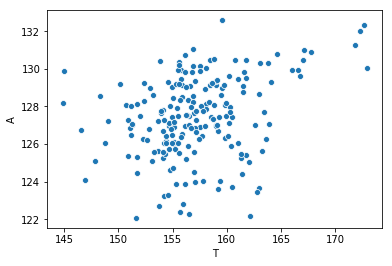

In [38]:
# plot a scatter plot of abdominal length and thoracic length

sns.scatterplot(data=ATratio, x="T", y="A")

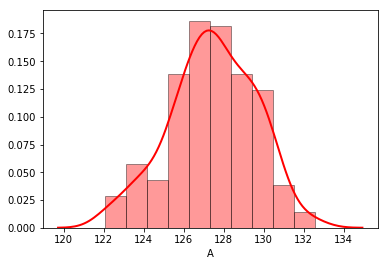

In [36]:
# plot distribution of abdominal length
sns.distplot(ATratio['A'], hist=True, kde=True, color = 'red', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2})

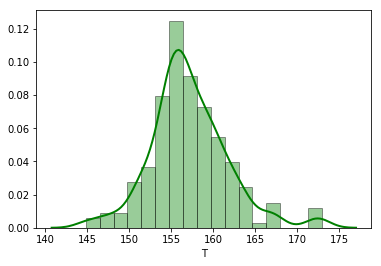

In [37]:
# plot distribution of thoracic length
sns.distplot(ATratio['T'], hist=True, kde=True, color = 'green', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2})

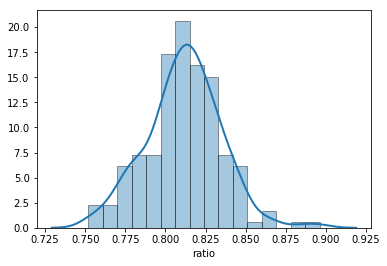

In [32]:
# plot distribution of A:T ratio
# Density Plot and Histogram of A:T ratio of frames extrated from video

sns.distplot(ATratio['ratio'], hist=True, kde=True, hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2})
